# Case Study 3
## Questions:
1. Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

2. Find out the unique number of high level class.

3. Use the 16-intermediate feature and perform an agglomerative clustering.
[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

4. Compute the mean squared error by comparing the actual class and predicted high level class.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_animals = pd.read_csv("zoo.csv")
df_animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df_animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df_animals.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

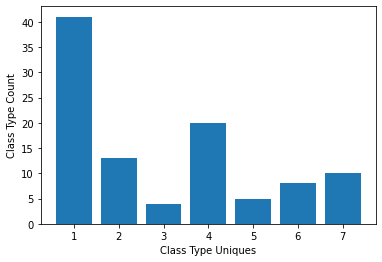

In [66]:
fig, ax = plt.subplots()

plt.bar(df_animals.class_type.unique(), df_animals.class_type.value_counts())
plt.xlabel("Class Type Uniques")
plt.ylabel("Class Type Count")
plt.show()

In [9]:
df_animals.class_type.nunique()

7

In [74]:
X= df_animals.iloc[:,1:17]
y = df_animals.class_type
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [69]:
from sklearn.cluster import AgglomerativeClustering

aggloCluster = AgglomerativeClustering(n_clusters=7,
                                    linkage="average", affinity="cosine")
aggloCluster.fit(X)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [70]:
aggloCluster.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [22]:
np.unique(aggloCluster.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [73]:
labels = y -1
labels

0      0
1      0
2      3
3      0
4      0
      ..
96     0
97     5
98     0
99     6
100    1
Name: class_type, Length: 101, dtype: int64

In [78]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(labels,aggloCluster.labels_)
score

5.9405940594059405

In [79]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
